# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
pip install --upgrade jupyter


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 121 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 385 kB 38.6 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 34.6 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 45.3 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 5.1.4 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding 

In [3]:
pip install --upgrade ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: ipywidgets in /root/.local/lib/python3.7/site-packages (8.0.6)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Define transforms

mean = (0.1307)
std = (0.3081)
train_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])
                                       
test_transforms = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root = './data', download=True, train=True, transform=train_transforms)

train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root= './data', download=True, train=False,transform=test_transforms)

test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=32)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1. ToTensor: Converts the image from PIL format to PyTorch tensor.

2. Normalize: Normalizes the image tensor by substracting the mean and dividing by the standard deviation along each channel. Ensures each channel has a similar scale and distribution.

These transforms reduce overfitting and model's ability to generalize to unseen data. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


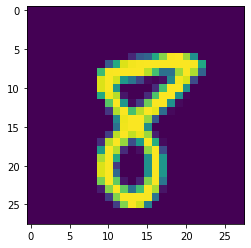

5


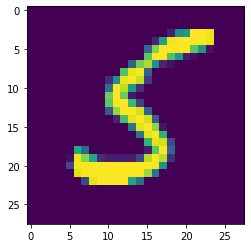

1


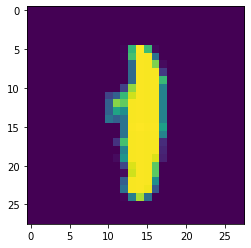

2


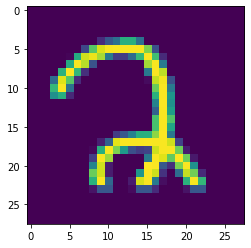

2


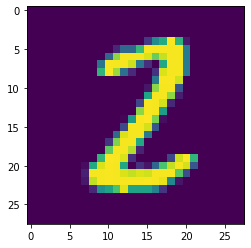

In [6]:
# Explore data
show5(train_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
#check whether the layers have been flattened
image, _ = train_set[0]
print(image.shape)

torch.Size([1, 28, 28])


In [8]:
#build the neural network
def neural_network():
    model = nn.Sequential(
        nn.Flatten(), #flatten layer to flatten input tensors
        nn.Linear(784, 128), #fully connected layer 1
        nn.ReLU(), #ReLU activation
        nn.Linear(128,64), #fully connected layer 2
        nn.ReLU(), #ReLU activation
        nn.Linear(64,10) #fully connected layer 3
    )
    return model

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
#instantiate the model
model = neural_network()

#set up loss function
loss_function=nn.CrossEntropyLoss()

#set up optimizer
optimizer=optim.Adam(model.parameters(), lr=0.0009)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Testing your model
Using the previously created DataLoader for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further! If your accuracy is under 90%, you'll need to make improvements. Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [24]:
#train neural network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
#move model to GPU
model.to(device)

epochs=5
print_every=250
training_loss_values = []
accuracy_values = []

#training loop
for epoch in range(epochs):
    model.train()
    training_loss=0.0
    total_batches=len(train_dataloader)
    
    for batch_idx, (inputs, labels) in enumerate(train_dataloader):
        #move inputs and labels to the default device
        inputs, labels=inputs.to(device), labels.to(device)
        
        #sets all the gradients to zero for every parameter the optimizer is responsible for
        optimizer.zero_grad()

        #forward pass
        outputs=model.forward(inputs)
        
        #calculate loss
        loss = loss_function(outputs,labels)
        
        #backward pass and optimization
        loss.backward()
        
        #update parameters using computed gradients
        optimizer.step()
        
        training_loss += loss.item()
        
        if (batch_idx +1) % print_every ==0:
            average_loss = training_loss
            print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_dataloader)}], Loss: {average_loss:.4f}")
            training_loss_values.append(average_loss)
            training_loss = 0.0
            test_loss = 0
            accuracy = 0
            
            #evaluation on test set
            model.eval()
            
            correct_predictions = 0
            
            with torch.no_grad():
                for inputs, labels in test_dataloader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    outputs=model.forward(inputs)
                    batch_loss = loss_function(outputs, labels)
                    test_loss += batch_loss.item()
                    
                    #testing the model
                    #predicted labels with highest probability
                    _, predicted_labels = torch.max(outputs, dim=1)
                    #number of correct predictions
                    correct_predictions += (predicted_labels == labels).sum().item()
                    #total samples
                    samples = len(test_dataloader.dataset)
                    #accuracy
                    accuracy = (correct_predictions / samples)* 100
                    accuracy_values.append(accuracy)
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                    f"Train loss: {average_loss:.3f}.. "
                    f"Test loss: {test_loss:.3f}.. "
                    f"Test accuracy: {accuracy:.3f}")

Epoch [1/5], Batch [250/1875], Loss: 16.2514
Epoch 1/5.. Train loss: 16.251.. Test loss: 21.255.. Test accuracy: 97.880
Epoch [1/5], Batch [500/1875], Loss: 5.7498
Epoch 1/5.. Train loss: 5.750.. Test loss: 19.616.. Test accuracy: 97.960
Epoch [1/5], Batch [750/1875], Loss: 5.1266
Epoch 1/5.. Train loss: 5.127.. Test loss: 20.865.. Test accuracy: 97.920
Epoch [1/5], Batch [1000/1875], Loss: 4.5451
Epoch 1/5.. Train loss: 4.545.. Test loss: 19.854.. Test accuracy: 97.960
Epoch [1/5], Batch [1250/1875], Loss: 5.0215
Epoch 1/5.. Train loss: 5.021.. Test loss: 20.559.. Test accuracy: 97.960
Epoch [1/5], Batch [1500/1875], Loss: 5.1020
Epoch 1/5.. Train loss: 5.102.. Test loss: 19.900.. Test accuracy: 98.000
Epoch [1/5], Batch [1750/1875], Loss: 4.7846
Epoch 1/5.. Train loss: 4.785.. Test loss: 20.085.. Test accuracy: 98.050
Epoch [2/5], Batch [250/1875], Loss: 13.7660
Epoch 2/5.. Train loss: 13.766.. Test loss: 22.219.. Test accuracy: 97.780
Epoch [2/5], Batch [500/1875], Loss: 4.8209
Epoc

Plot the training loss (and validation loss/accuracy, if recorded).

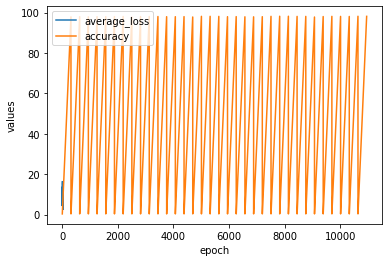

In [28]:
#plot training loss
plt.plot(training_loss_values, label='average_loss')
plt.plot(accuracy_values, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('values')
plt.legend()
plt.show()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
len(test_dataloader)

313

In [14]:
len(train_dataloader)

1875

In [15]:
len(train_set)

60000

In [16]:
len(test_set)

10000

In [17]:
len(train_dataloader.dataset)

60000

In [18]:
len(test_dataloader.dataset)

10000

In [21]:
#build the neural network
def neural_network():
    model = nn.Sequential(
        nn.Flatten(), #flatten layer to flatten input tensors
        nn.Linear(784, 128), #fully connected layer 1
        nn.ReLU(), #ReLU activation
        nn.Dropout(p=0.15),
        nn.Linear(128,64), #fully connected layer 2
        nn.ReLU(), #ReLU activation
        nn.Linear(64,10), #fully connected layer 3
        nn.LogSoftmax(dim=1)
    )
    return model

#instantiate the model
model = neural_network()
#set up loss function
loss_function=nn.NLLLoss()

#set up optimizer
optimizer=optim.SGD(model.parameters(), lr=0.02)

#train neural network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
#move model to GPU
model.to(device)

epochs=12
print_every=250
training_loss_values = []
accuracy_values = []

#training loop
for epoch in range(epochs):
    model.train()
    training_loss=0.0
    total_batches=len(train_dataloader)
    
    for batch_idx, (inputs, labels) in enumerate(train_dataloader):
        #move inputs and labels to the default device
        inputs, labels=inputs.to(device), labels.to(device)
        
        #sets all the gradients to zero for every parameter the optimizer is responsible for
        optimizer.zero_grad()

        #forward pass
        outputs=model.forward(inputs)
        
        #calculate loss
        loss = loss_function(outputs,labels)
        
        #backward pass and optimization
        loss.backward()
        
        #update parameters using computed gradients
        optimizer.step()
        
        training_loss += loss.item()
        
        if (batch_idx +1) % print_every ==0:
            average_loss = training_loss
            print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_dataloader)}], Loss: {average_loss:.4f}")
            training_loss_values.append(average_loss)
            training_loss = 0.0
            test_loss = 0
            accuracy = 0
            
            #evaluation on test set
            model.eval()
            
            correct_predictions = 0
            
            with torch.no_grad():
                for inputs, labels in test_dataloader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    outputs=model.forward(inputs)
                    batch_loss = loss_function(outputs, labels)
                    test_loss += batch_loss.item()
                    
                    #testing the model
                    #predicted labels with highest probability
                    _, predicted_labels = torch.max(outputs, dim=1)
                    #number of correct predictions
                    correct_predictions += (predicted_labels == labels).sum().item()
                    #total samples
                    samples = len(test_dataloader.dataset)
                    #accuracy
                    accuracy = (correct_predictions / samples) * 100
                    accuracy_values.append(accuracy)
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                    f"Train loss: {average_loss:.3f}.. "
                    f"Test loss: {test_loss:.3f}.. "
                    f"Test accuracy: {accuracy:.3f}")

Epoch [1/12], Batch [250/1875], Loss: 306.9717
Epoch 1/12.. Train loss: 306.972.. Test loss: 154.888.. Test accuracy: 0.868
Epoch [1/12], Batch [500/1875], Loss: 100.7917
Epoch 1/12.. Train loss: 100.792.. Test loss: 114.896.. Test accuracy: 0.888
Epoch [1/12], Batch [750/1875], Loss: 84.7551
Epoch 1/12.. Train loss: 84.755.. Test loss: 90.909.. Test accuracy: 0.914
Epoch [1/12], Batch [1000/1875], Loss: 75.2971
Epoch 1/12.. Train loss: 75.297.. Test loss: 83.141.. Test accuracy: 0.922
Epoch [1/12], Batch [1250/1875], Loss: 67.9802
Epoch 1/12.. Train loss: 67.980.. Test loss: 74.947.. Test accuracy: 0.930
Epoch [1/12], Batch [1500/1875], Loss: 62.5242
Epoch 1/12.. Train loss: 62.524.. Test loss: 67.681.. Test accuracy: 0.939
Epoch [1/12], Batch [1750/1875], Loss: 60.0760
Epoch 1/12.. Train loss: 60.076.. Test loss: 63.959.. Test accuracy: 0.943
Epoch [2/12], Batch [250/1875], Loss: 61.9357
Epoch 2/12.. Train loss: 61.936.. Test loss: 59.206.. Test accuracy: 0.943
Epoch [2/12], Batch [5

## Saving your model
Using `torch.save`, save your model for future loading.

In [29]:
path = './model.pth'
torch.save(model.state_dict(), path)